<a href="https://colab.research.google.com/github/FGalvao77/Deteccao-de-pose-de-ioga-com-Rede-Neural-Artificial-utilizando-o-TensorFlow-e-Keras/blob/main/Detec%C3%A7%C3%A3o_de_pose_de_ioga_com_RNA_TensorFlow_e_Keras.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Detecção de pose de ioga com Rede Neural Artificial utilizando o TensorFlow e Keras**


---



### **1. Introdução**

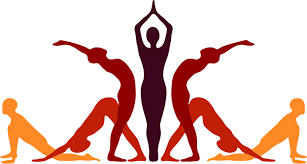

**Yoga** é um grupo de práticas ou disciplinas físicas, mentais e espirituais originadas na Índia antiga.



Há uma ampla variedade de escolas, práticas e objetivos de ioga no hinduísmo, budismo e jainismo. O termo "ioga" no mundo ocidental frequentemente denota uma forma moderna de hatha ioga e ioga como exercício, consistindo principalmente de posturas ou `asanas`.

- _Asana é uma palavra que em sânscrito significa postura confortável. Embora existam milhares de asanas, apenas 84 delas foram formalizadas nas escrituras budistas. Desenvolvidas há milhares de anos pelos iogues indianos, elas possuem a finalidade de oferecer equilíbrio físico, mental e espiritual aos seus praticantes_

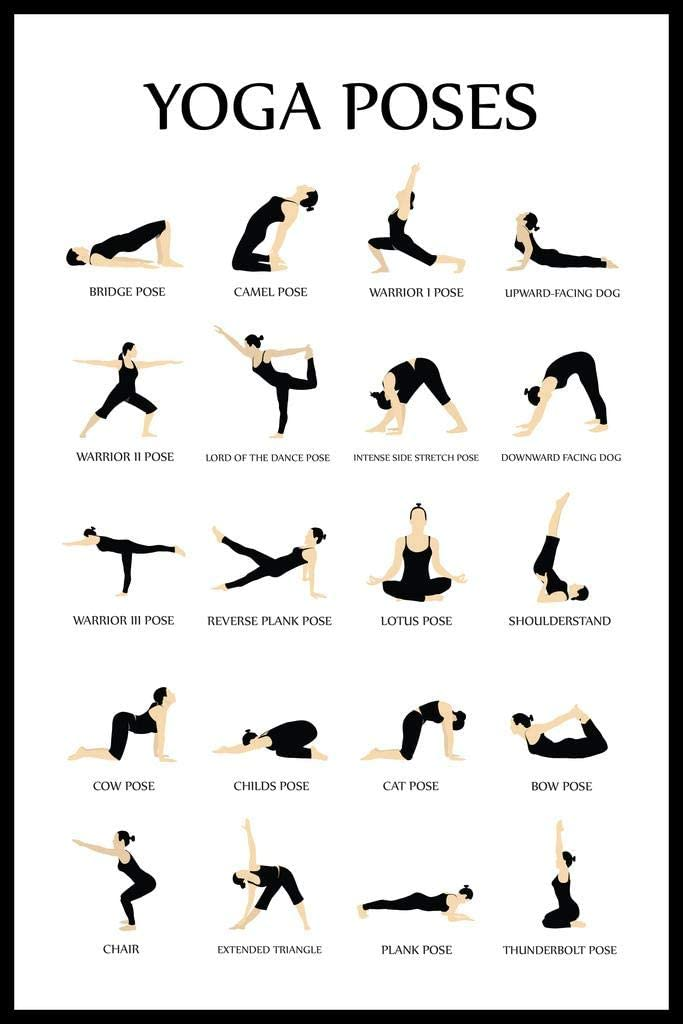

Acredita-se que a prática de ioga remonte às tradições indígenas pré-védicas, possivelmente na civilização do vale do Indo por volta de 3000 aC. Yoga é mencionado no Rigveda e também referenciado nos Upanishads, embora provavelmente tenha se desenvolvido como um estudo sistemático por volta dos séculos 5 e 6 AC, nos movimentos ascéticos e Śramaṇa da Índia antiga. 

A cronologia dos primeiros textos que descrevem as práticas de ioga não é clara, sendo creditada de maneira variável aos Upanishads. Os Ioga Sutras de Patanjali datam do século 2 aC e ganharam destaque no oeste no século 20 após serem introduzidos por Swami Vivekananda. Textos de hatha yoga começaram a surgir em algum momento entre os séculos IX e XI com origens no tantra.

O conjunto de dados utilizado foi extraído do [Kaggle](https://www.kaggle.com/niharika41298/yoga-poses-dataset).

**Há 5 poses de ioga dentro do conjunto de dados:**

- Downdog 
- Goddess
- Plank
- Tree 
- Warrior2

### **2. Importando as bibliotecas e o conjunto de imagens**

In [1]:
# importando as bibliotecas necessárias
import pandas as pd
import os
import cv2

import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import VGG16, InceptionResNetV2
from tensorflow.keras.optimizers import Adam, RMSprop, SGD, Adamax

import keras
from keras.preprocessing import image
from keras.models import Sequential
from keras.layers import Conv2D, MaxPool2D, Flatten, Dense, Dropout, BatchNormalization
from keras.layers import Input, Lambda, Dense, Flatten
from keras import regularizers

from PIL import Image
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

from warnings import filterwarnings
filterwarnings('ignore')

In [2]:
# atualizando os diretórios
!apt-get update

Get:1 http://ppa.launchpad.net/c2d4u.team/c2d4u4.0+/ubuntu bionic InRelease [15.9 kB]
Hit:2 http://ppa.launchpad.net/cran/libgit2/ubuntu bionic InRelease
Get:3 https://cloud.r-project.org/bin/linux/ubuntu bionic-cran40/ InRelease [3,626 B]
Hit:4 http://ppa.launchpad.net/deadsnakes/ppa/ubuntu bionic InRelease
Get:5 http://ppa.launchpad.net/graphics-drivers/ppa/ubuntu bionic InRelease [21.3 kB]
Hit:6 http://archive.ubuntu.com/ubuntu bionic InRelease
Get:7 http://archive.ubuntu.com/ubuntu bionic-updates InRelease [88.7 kB]
Get:8 http://archive.ubuntu.com/ubuntu bionic-backports InRelease [74.6 kB]
Get:9 http://security.ubuntu.com/ubuntu bionic-security InRelease [88.7 kB]
Ign:10 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  InRelease
Get:11 http://ppa.launchpad.net/c2d4u.team/c2d4u4.0+/ubuntu bionic/main Sources [1,810 kB]
Ign:12 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  InRelease
Get:13 https://developer.download

In [3]:
# removendo apicações obsoletas
!apt autoremove

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following packages will be REMOVED:
  libnvidia-common-460
0 upgraded, 0 newly installed, 1 to remove and 60 not upgraded.
After this operation, 35.8 kB disk space will be freed.
(Reading database ... 155062 files and directories currently installed.)
Removing libnvidia-common-460 (460.91.03-0ubuntu1) ...


O conjunto de imagens está salvo no meu `google drive`, portanto estarei realizando o acesso do mesmo e, para posteriormente instanciar o diretório das imagens de treino e teste.

In [4]:
# acessando o google drive
from google.colab import drive
drive.mount('/content/arquivos_driver')

Mounted at /content/arquivos_driver


In [5]:
# diretório das imagens de treinamento
train_dir = '/content/arquivos_driver/MyDrive/DATASET/TRAIN'

# diretório das imagens de teste
test_dir = '/content/arquivos_driver/MyDrive/DATASET/TEST' 

### **3. Pré-processamento das imagens**

In [6]:
# configurando a geração dos dados das imagens de treino e teste
train_datagen = ImageDataGenerator(width_shift_range = 0.1,
                                  horizontal_flip = True,
                                  rescale = 1./255,
                                  validation_split = 0.2)

test_datagen = ImageDataGenerator(rescale = 1./255,
                                 validation_split = 0.2)

In [7]:
# gerando as imagens de treino
train_generator =  train_datagen.flow_from_directory(directory = train_dir,
                                                    target_size = (224,224),
                                                    color_mode = 'rgb',
                                                    class_mode = 'categorical',
                                                    batch_size = 16,
                                                    subset = 'training')

# gerando as imagens de teste (validação)
validation_generator  = test_datagen.flow_from_directory(directory = test_dir,
                                                  target_size = (224,224),
                                                  color_mode = 'rgb',
                                                  class_mode = 'categorical',
                                                  subset = 'validation')

Found 866 images belonging to 5 classes.
Found 92 images belonging to 5 classes.


In [8]:
# instanciando o caminho do conjunto de dados
BASE_PATH_train = '/content/arquivos_driver/MyDrive/DATASET/'

In [9]:
# criando um dataframe com o conjunto de dados de treino

filenames, labels = [], []  # instanciando duas listas para armazenar os dados

# realizando um laço de repetição e instanciando os dados de treino
for dirname in os.listdir(f'{BASE_PATH_train}TRAIN'):
    for file in os.listdir(f'{BASE_PATH_train}TRAIN/{dirname}'):
        filenames.append(file)
        labels.append(dirname)

# instanciando um dataframe com os dados de treino
df_train = pd.DataFrame(data={
    'filename': filenames,
    'labels': labels
})

In [10]:
# visualizando a dimensão do dataframe de treino
df_train.shape

(1081, 2)

In [11]:
# visualizando as 5 primeiras linhas do dataframe de treino
df_train.head()

,filename,labels
0,00000096.jpg,goddess
1,00000142.jpg,goddess
2,00000155.jpg,goddess
3,00000127.png,goddess
4,00000143.jpg,goddess


In [43]:
# contabiblizando a quantidade de instâncias por classe de rótulos
df_train.labels.value_counts(), df_train.labels.value_counts(normalize=True)

(plank       266
 warrior2    252
 downdog     223
 goddess     180
 tree        160
 Name: labels, dtype: int64, plank       0.246068
 warrior2    0.233117
 downdog     0.206290
 goddess     0.166512
 tree        0.148011
 Name: labels, dtype: float64)

In [41]:
# visualizando as classes e contabilizando-as
num_classes = list(df_train.labels.unique())

print(f'Classes: {num_classes}')
len(f'\nTotal de classes: {num_classes}')

Classes: ['goddess', 'tree', 'warrior2', 'plank', 'downdog']


70

Agora vamos visualizar algumas amostras das imagens e, as poses presentes no conjunto de dados de treino.

In [35]:
# importando as funções
from tensorflow.keras.preprocessing.image import load_img, img_to_array

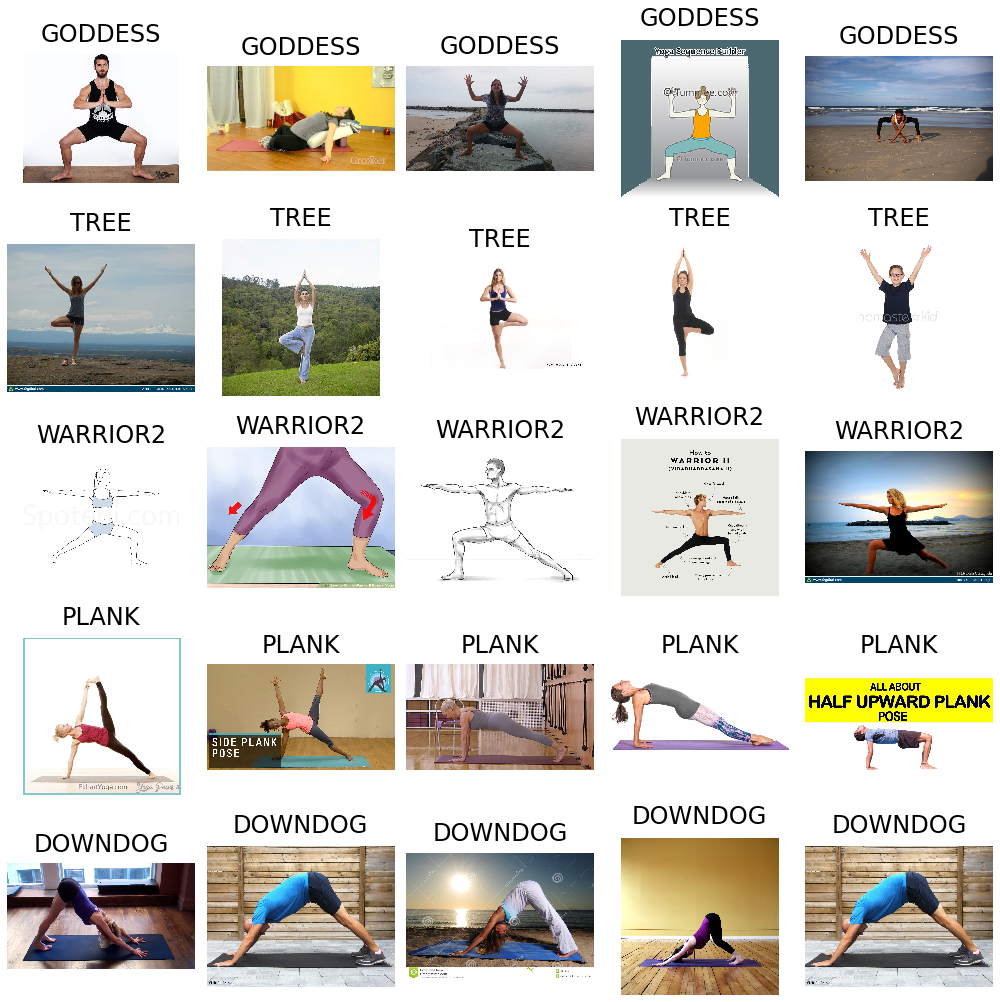

In [39]:
# definindo as configuraçõe de plotagem das imagens

# grade da plotagem das imagens - 5 X 5, total de 25 imagens
rows = 5    # linhas
cols = 5    # colunas

# tamanho das imagens
fig, axs = plt.subplots(rows, cols, figsize=(14, 14))

# realizando um laço de repetição
for i, row in enumerate(list(df_train.labels.unique())):
    for j, filename in enumerate(df_train[df_train.labels == row]['filename'].tolist()[:cols]):
        img = load_img(os.path.join(BASE_PATH_train,'TRAIN',row, filename))
        axs[i,j].matshow(img)
        axs[i,j].axis('off')
        axs[i,j].set_title(row.upper(), fontsize=24)

# plotando a imagem
fig.tight_layout()

### **4. Instanciando a rede neural artificial, otimizador e o compilador**

In [13]:
# instanciando a rede neural artificial e definindo as configurações das camadas
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(64, (3, 3), activation = 'relu', 
                           padding = 'Same', input_shape=(224, 224, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Dropout(0.25),

    tf.keras.layers.Conv2D(128, (3, 3), activation = 'relu',
                           padding = 'Same'),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Dropout(0.25),

    tf.keras.layers.Conv2D(256, (3, 3), activation = 'relu', 
                           padding = 'Same'),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Dropout(0.25),

    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(1024, activation='relu'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(5, activation='softmax')
])

> Ao treinar um modelo de aprendizado de máquina, gostaríamos de ter a capacidade de monitorar o desempenho do modelo e executar certas ações dependendo dessas medidas de desempenho. É aí que entram os retornos de chamada de **Keras**.<br><br>
_`Callbacks` são um tipo importante de objeto TensorFlow e Keras que são projetados para monitorar o desempenho das métricas em certos pontos da execução do treinamento e realizar alguma ação que pode depender desse desempenho nos valores das métricas._

As **APIs** mais populares de retorno de chamada _Keras_, são:

1. `EarlyStopping`: um retorno de chamada projetado para parada precoce;
2. `CSVLogger`: um retorno de chamada transmite resultados de época para um arquivo CSV;
3. `ModelCheckpoint`: um retorno de chamada para salvar o modelo Keras ou o peso do modelo durante o treinamento;
4. `ReduceLROnPlateau`: um retorno de chamada para reduzir a taxa de aprendizagem quando uma métrica para de melhorar;
5. `LearningRateScheduler`: um retorno de chamada para programações de taxas de aprendizagem e,
6. `LambdaCallback`: um retorno de chamada para criar retornos de chamada personalizados dinamicamente.

Na aplicação utlizaremos o `ReduceLROnPlateau` e o `EarlyStopping`.

Segue abaixo links para um melhor entendimento dessas funções de retorno de chamada.

> No `Medium` tem um artigo explicando bem as funções acima.

- [Is your epochs not performing? Try callbacks!](https://bit.ly/3nG6yoo)

> Documentação oficial das funções:

- [ReduceLROnPlateau](https://bit.ly/3nPKkQK)
- [EarlyStopping](https://bit.ly/3jW1gEa)

In [14]:
# importando a biblioteca para parar o treinamento se acaso o modelo estagnar-se
from tensorflow.keras.callbacks import ReduceLROnPlateau, EarlyStopping

In [15]:
# instanciando as configurações de parada
lr_reduction = ReduceLROnPlateau(monitor='val_accuracy',
                                 patience=3, 
                                 verbose=1, 
                                 factor=0.5, 
                                 min_lr=0.00001)

es = EarlyStopping(monitor='val_loss',
                   min_delta=0,
                   patience=5,
                   verbose=0, mode='auto')

In [16]:
# instanciando o otimizador
optimizer = Adam(learning_rate=0.001)

callbacks_list = [es, lr_reduction]

# definindo o compilador do modelo
model.compile(loss='categorical_crossentropy',
              optimizer = optimizer,
              metrics=['accuracy'])

epochs = 30     # número de épocas 
batch_size = 32 # tamanho do lote     

In [17]:
# visualizando o sumário do modelo
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 224, 224, 64)      1792      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 112, 112, 64)      0         
_________________________________________________________________
dropout (Dropout)            (None, 112, 112, 64)      0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 112, 112, 128)     73856     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 56, 56, 128)       0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 56, 56, 128)       0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 56, 56, 256)       2

In [18]:
# importando a função "PIL" da biblioteca "ImageFile" 
from PIL import ImageFile

# configurando o carregamento das imagens
ImageFile.LOAD_TRUNCATED_IMAGES = True

### **5. Aplicando o treinamento e avaliando o modelo**

O processo de treinamento do modelo levará um tempo considerável.

In [19]:
# aplicando treinamento do modelo com os dados "train_generator", número de épocas e validação dos dados
history = model.fit(train_generator, 
                    epochs = epochs, 
                    validation_data = validation_generator, 
                    batch_size = batch_size,
                    callbacks = callbacks_list, 
                    shuffle = True
                    )

Epoch 1/30
55/55 [==============================] - 508s 9s/step - loss: 3.3323 - accuracy: 0.2148 - val_loss: 1.6044 - val_accuracy: 0.2283
Epoch 2/30
55/55 [==============================] - 271s 5s/step - loss: 1.5963 - accuracy: 0.2413 - val_loss: 1.5960 - val_accuracy: 0.2500
Epoch 3/30
55/55 [==============================] - 276s 5s/step - loss: 1.5566 - accuracy: 0.2794 - val_loss: 1.3970 - val_accuracy: 0.4457
Epoch 4/30
55/55 [==============================] - 272s 5s/step - loss: 1.4820 - accuracy: 0.3822 - val_loss: 1.2665 - val_accuracy: 0.4891
Epoch 5/30
55/55 [==============================] - 277s 5s/step - loss: 1.4017 - accuracy: 0.4215 - val_loss: 1.1188 - val_accuracy: 0.5870
Epoch 6/30
55/55 [==============================] - 274s 5s/step - loss: 1.2490 - accuracy: 0.5035 - val_loss: 1.0128 - val_accuracy: 0.5870
Epoch 7/30
55/55 [==============================] - 277s 5s/step - loss: 1.2394 - accuracy: 0.5185 - val_loss: 0.9655 - val_accuracy: 0.6957
Epoch 8/30
55

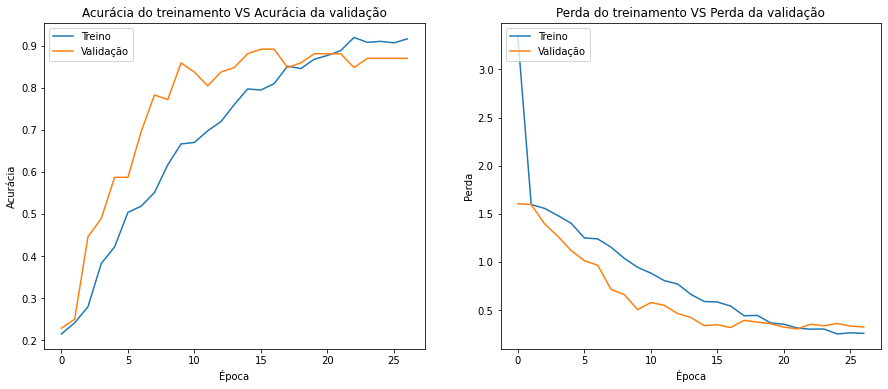

In [20]:
# plotando gráficos de avaliação do modelo - acurácia e perda
fig , ax = plt.subplots(1, 2)

train_acc = history.history['accuracy']
train_loss = history.history['loss']

fig.set_size_inches(15, 6)

ax[0].plot(history.history['accuracy'])
ax[0].plot(history.history['val_accuracy'])
ax[0].set_title('Acurácia do treinamento VS Acurácia da validação')
ax[0].set_ylabel('Acurácia')
ax[0].set_xlabel('Época')
ax[0].legend(['Treino', 'Validação'], loc='upper left')

ax[1].plot(history.history['loss'])
ax[1].plot(history.history['val_loss'])
ax[1].set_title('Perda do treinamento VS Perda da validação')
ax[1].set_ylabel('Perda')
ax[1].set_xlabel('Época')
ax[1].legend(['Treino', 'Validação'], loc='upper left')

plt.show();

In [21]:
# importando a biblioteca
import numpy as np

# visualizando os rótulos de conjunto de dados de validação
y_validation = []   # instanciando uma lista para armazenar os rótulos

# realizando um laço de repetição no conjunto de dados de validação
for i in range(validation_generator.__len__()):
    y_validation.extend(
        validation_generator.__getitem__(i)[1] 
    )

# criando um vetor com os rótulos
y_validation = np.array(y_validation)
y_validation = np.argmax(y_validation, axis=1)

In [22]:
# visualizando os 20 primeiros rótulos
y_validation[:20]

array([4, 2, 0, 4, 0, 3, 2, 4, 3, 0, 0, 4, 4, 4, 0, 4, 2, 1, 0, 0])

In [23]:
# realizando predições com o modelo com o conjunto de dados de validação
y_preds = model.predict(validation_generator)
y_preds = np.argmax(y_preds, axis=1)

# visualizando as 20 primeiras predições
y_preds[:20]

array([4, 2, 0, 4, 0, 3, 4, 4, 3, 0, 0, 4, 4, 4, 0, 4, 2, 1, 0, 2])

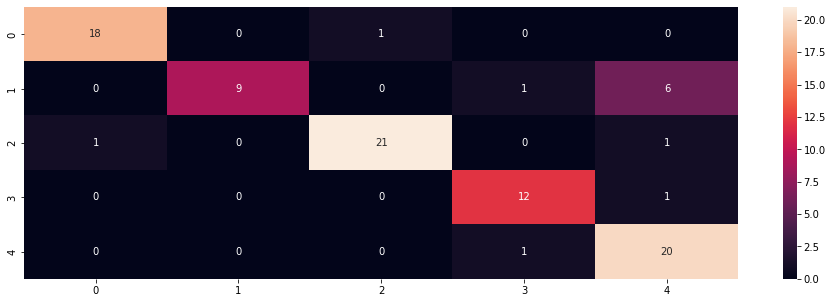




              precision    recall  f1-score   support

           0       0.95      0.95      0.95        19
           1       1.00      0.56      0.72        16
           2       0.95      0.91      0.93        23
           3       0.86      0.92      0.89        13
           4       0.71      0.95      0.82        21

    accuracy                           0.87        92
   macro avg       0.89      0.86      0.86        92
weighted avg       0.89      0.87      0.87        92



In [24]:
# importando a função para plotar o relatório e a matriz de confusão
from sklearn.metrics import classification_report, confusion_matrix

# instanciando a matriz de confusão
cf_matrix = confusion_matrix(y_validation, y_preds)

# plotando a matriz de confusão
plt.figure(figsize=(16, 5))
ax = sns.heatmap(cf_matrix, annot=True, fmt='g')
plt.show();

# visualizando o relatório
print('\n\n')
print(classification_report(y_validation, y_preds))

In [25]:
# instanciando a perda e acurácia do treino e teste
train_loss, train_acc = model.evaluate(train_generator)
test_loss, test_acc   = model.evaluate(validation_generator)

# visualizando a acurácia do treino e teste
print('acurácia final do treino = {:.2f}, acurácia da validação = {:.2f}'.format(train_acc * 100, 
                                                                                  test_acc * 100))

# visualizando a perda do treino e teste
print('perda final do treino = {:.2f}, perda da validação = {:.2f}'.format(train_loss * 100, 
                                                                                  test_loss * 100))

3/3 [==============================] - 8s 2s/step - loss: 0.3236 - accuracy: 0.8696
acurácia final do treino = 93.19, acurácia da validação = 86.96
perda final do treino = 19.58, perda da validação = 32.36


In [26]:
# salvando o modelo
model.save('YogaPoseNet_model1.h5')

In [27]:
# importando a biblioteca
from keras.models import load_model
from keras.applications.vgg16 import preprocess_input

In [28]:
# instanciando o modelo salvo na variável "modelo"
model = load_model('YogaPoseNet_model1.h5')

# instanciando uma imagem do conjunto de teste
img = image.load_img('/content/arquivos_driver/MyDrive/DATASET/TEST/goddess/00000000.jpg', 
                     target_size=(224, 224))

In [29]:
# transformando a imagem instanciada acima em um vetor (array)
x = image.img_to_array(img)
x = np.expand_dims(x, axis=0)

# aplicando o pré-processamento da imagem
img_data = preprocess_input(x)

In [31]:
# realizando a predição da imagem com o modelo
classes = model.predict(img_data)

# visualizando a classe predita pelo modelo
print(classes)

[[0. 0. 0. 0. 1.]]


> A previsão realizada acima está correta!